In [1]:
import math

import numpy as num

#TODO: provare nel branch principale il dataset che riprende tutto in tre dimensione x y z


# import openpyxl
# 
# try:
#     workbook = openpyxl.load_workbook("dataset/Graphs_August_ADWR_cleaned.xlsx")
#     sheet = workbook.active
#     # Fai qualcosa con il tuo foglio Excel
# except FileNotFoundError:
#     print("Il file non è stato trovato.")
# except Exception as e:
#     print(f"Si è verificato un errore: {e}")
# 

import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)


    Porosity_Tot    SSA_Tot  Conn.Dens.  Porosity     SSA      Ech  \
0          0.205  45.892683     310.913     0.137   5.065  -25.849   
1          0.205  45.892683     310.913     0.147   5.253  -31.002   
2          0.205  45.892683     310.913     0.131   4.697  -20.047   
3          0.176  54.744318     350.137     0.115   5.583  -50.613   
4          0.176  54.744318     350.137     0.139   7.447 -136.737   
5          0.176  54.744318     350.137     0.115   5.311  -32.907   
6          0.184  53.413043     368.141     0.134   6.990 -115.218   
7          0.184  53.413043     368.141     0.138   7.132 -110.411   
8          0.184  53.413043     368.141     0.116   5.290  -39.748   
9          0.020  45.650000      10.573     0.020   0.791   -3.948   
10         0.020  45.650000      10.573     0.020   0.806   -2.017   
11         0.274  36.324818     458.436     0.273   7.721 -102.424   
12         0.274  36.324818     458.436     0.250   6.870  -76.478   
13         0.274  36

In [2]:
df.describe()


,Porosity_Tot,SSA_Tot,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01
mean,0.139458,60.741732,265.459104,0.120208,6.096313,-104.954437,3.179715,8.727964e-12
std,0.074606,15.549278,161.555747,0.067272,2.480017,74.521722,0.871756,2.460269e-11
min,0.020000,34.412969,10.573000,0.020000,0.791000,-362.849000,1.340000,0.000000e+00
25%,0.082500,51.740817,111.068250,0.076750,4.734500,-156.334000,2.777750,2.999780e-13
50%,0.144500,59.018571,305.086500,0.111500,5.695500,-106.417500,3.326650,5.446314e-13
75%,0.178000,78.543624,354.638000,0.137250,7.670000,-42.832000,3.817000,1.441766e-12
max,0.293000,89.214286,607.796000,0.297000,10.300000,-2.017000,4.459000,1.319490e-10


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from numpy import real


#Standardizza i dati con lo scaler
scaler = MinMaxScaler()  

scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

df_scaled.describe()

,Porosity_Tot,SSA_Tot,Conn.Dens.,Porosity,SSA,Ech,Tortuosity,k_m2
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.437576,0.480440,0.426785,0.361763,0.557925,0.714722,0.589841,0.066146
std,0.273284,0.283739,0.270512,0.242861,0.260807,0.206527,0.279499,0.186456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228938,0.316194,0.168271,0.204874,0.414712,0.572330,0.460965,0.002273
50%,0.456044,0.448997,0.493138,0.330325,0.515775,0.710667,0.636951,0.004128
75%,0.578755,0.805285,0.576108,0.423285,0.723420,0.886886,0.794165,0.010927
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


R 2 : 0.9165797167671749


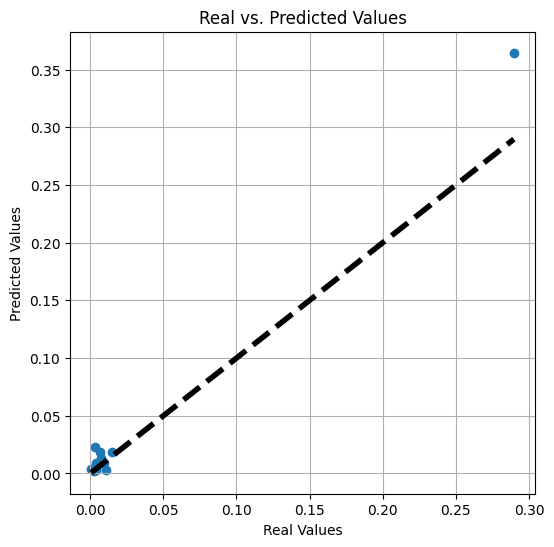

In [5]:
# In questo esempio, consideriamo k sia la colonna target
features_X = df_scaled.drop(['k_m2'], axis=1)  # Colonne features
targets_X = df_scaled[['k_m2']]  # Colonne target

# Suddivisione del dataset in set di addestramento e test

#TODO provare con 0.7 - 30  o  0.7 - 20
X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.3, random_state=42)
# 
# classifiers = {
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC(),
# }  # Lista dei modelli di classificazione

regressor =  RandomForestRegressor()
regressor. fit(X_train, y_train.values.ravel())
predict_k = regressor. predict(X_test)
print(f"R 2 : {regressor.score(X_test, y_test)}" )
mse_k = mean_squared_error(y_test, predict_k)

# Real vs. Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predict_k)
# inserisci una linea bisettrice che rappresenta landamento ottimale dei valori
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()
#Itera sulla lista dei modelli da provare
# for name, classifier in classifiers.items():
#         #Addestro il modello
#     classifier.fit(features_X_train, targets_X_train)
#     #Calcolo l'accuratezza del modello
#     predict = classifier.predict(features_X_test)
#         
#     #Stampo i risultati
#     print(f"Modello: {name}")
# print(f'Classification Report: \n {classification_report(targets_X_test, predict)}\n')KNeighborsClassifier()

(array([14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.0006431 , 0.01509529, 0.02954748, 0.04399967, 0.05845186,
        0.07290406, 0.08735625, 0.10180844, 0.11626063, 0.13071282,
        0.14516501, 0.1596172 , 0.17406939, 0.18852159, 0.20297378,
        0.21742597, 0.23187816, 0.24633035, 0.26078254, 0.27523473,
        0.28968692]),
 <BarContainer object of 20 artists>)

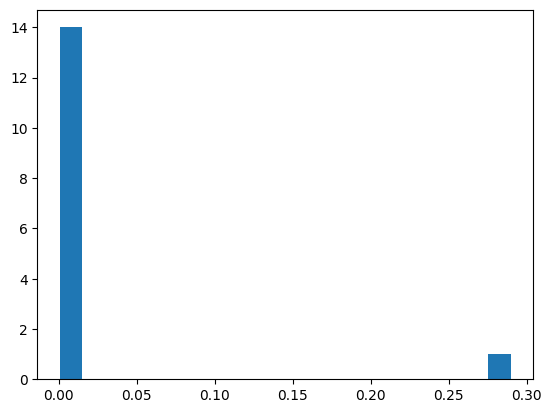

In [6]:
plt.hist(y_test, bins=20)

Valore reale: 0.003225113566605279 - Valore predetto: 0.003765926396562307 
Errore di previsione 0.0005408128299570279 

Valore reale: 0.004140073664825046 - Valore predetto: 0.0033374453898096968 
Errore di previsione 0.0008026282750153491 

Valore reale: 0.0022233701657458564 - Valore predetto: 0.002631727992633519 
Errore di previsione 0.00040835782688766276 

Valore reale: 0.004064100675260896 - Valore predetto: 0.003768698968692455 
Errore di previsione 0.00029540170656844117 

Valore reale: 0.009362062615101288 - Valore predetto: 0.009266714794352373 
Errore di previsione 9.534782074891585e-05 

Valore reale: 0.0006431000613873541 - Valore predetto: 0.003785138195211788 
Errore di previsione 0.003142038133824434 

Valore reale: 0.2896869244935544 - Valore predetto: 0.3645887176181705 
Errore di previsione 0.07490179312461615 

Valore reale: 0.0025698895027624308 - Valore predetto: 0.0023197392019643943 
Errore di previsione 0.0002501503007980364 

Valore reale: 0.0069578268876611

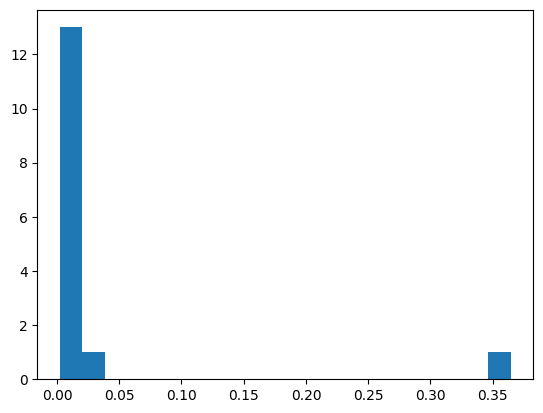

In [7]:
plt.hist(predict_k, bins=20)

y_ravel = y_test.values.ravel()

errori_list = []

for a in range(0, len(y_test)):
    errori_list.append(abs(y_ravel[a] - predict_k[a]))
    print(f"Valore reale: {y_ravel[a]} - Valore predetto: {predict_k[a]} \n"
         f"Errore di previsione { abs(y_ravel[a] - predict_k[a]) } \n")

In [8]:
# Supponiamo che predict_k sia il tuo array di previsioni standardizzate
# e che scaler sia un'istanza di MinMaxScaler già addestrata sul tuo dataset originale

errori_List = np.array(errori_list)
print("Dimensioni di errori_array:", errori_List.shape)

# De-standardizzazione dei residui
residui_originali = []

for i in range(len(errori_List)):
    residui_originali.append(
        errori_List[i] * (k2_max - k2_min) + k2_min
    )

print("\n\n---------\nResidui originali: \n", residui_originali)
# Ora residui_originali contiene i residui de-standardizzati


Dimensioni di errori_array: (15,)


---------
Residui originali: 
 [7.135971209999988e-14, 1.0590599826000031e-13, 5.388240690000022e-14, 3.897795977999925e-14, 1.2581049599998697e-14, 4.1458878972000025e-13, 9.883216700999977e-12, 3.300708204000011e-14, 1.5419091231000022e-12, 6.631794567000012e-13, 5.35206276900002e-13, 8.295652746000024e-13, 2.6689853079000022e-12, 1.01936891826e-12, 2.513721519000003e-13]


In [11]:
# In questa sezione devo verificare se il range di errore destandardizzato è accettabile
# L'errore può essere accettabile se non supera il range di un'ordine di grandezza

sentinella = 0
# Il rapporto che governerà questo range sarà il seguente:
# 0.7 < (y_test[i] / residui_originali[i]) < 1.3         -->     controllo del (+/-) 30% di errore
for i in range(len(y_test)):
    if 1.05 > (np.log10(y_ravel[i]) / np.log10(residui_originali[i])) > 0.95:
        print(f"Errore di previsione del dato {i} superiore al range ammissibile di un'ordine di grandezza")
        sentinella = 1

if sentinella == 0: 
    print("Tutti gli errori rientrano nel range di accettabilità")
        

Tutti gli errori rientrano nel range di accettabilità


In [12]:
#### test iperparametri più veloce...meno valori da provare....codice funzionante e veloce!!!

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time

# Definisci gli iperparametri da cercare
param_grid = {
    'n_estimators': [50],
    'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
    'max_features': [0.1, 1],
    'n_jobs': [-1],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Crea un oggetto GridSearchCV per la ricerca degli iperparametri con cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Lista per tenere traccia del tempo di esecuzione di ciascun set di iperparametri
execution_times = []

# Definisci il tempo massimo di esecuzione in secondi (300 secondi = 5 minuti)
max_execution_time = 300

start_time = time.time()

# Esegui la ricerca degli iperparametri
grid_search.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time
# iteration = 0

# Itera attraverso i parametri iperparametrici
# for params in ParameterGrid(param_grid):
#     # Misura il tempo di inizio dell'allenamento
#     start_time = time.time()
# 
#     # Esegui la ricerca degli iperparametri
#     grid_search.fit(X_train, y_train)
# 
#     # Calcola il tempo di fine dell'allenamento
#     end_time = time.time()
# 
#     # Calcola il tempo totale di addestramento
#     training_time = end_time - start_time
#     execution_times.append(training_time)
# 
#     # Incrementa il contatore delle iterazioni
#     iteration += 1
# 
#     # Verifica se il tempo massimo è stato superato
#     if sum(execution_times) + (training_time * (len(ParameterGrid(param_grid)) - iteration)) > max_execution_time:
#         print(f"Interrotto dopo {iteration} iterazioni (tempo limite raggiunto)")
#         break
#     
#     # Stampa l'avanzamento
#     print(f"Iterazione {iteration}/{len(ParameterGrid(param_grid))}, Tempo impiegato: {training_time:.2f} secondi")

# Trova il miglior modello
best_model = grid_search.best_estimator_

# Valuta il modello sul set di test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_bestModel = best_model.score(X_test, y_test)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2_bestModel)
print("Training Time (seconds):", training_time)




Best Parameters: {'criterion': 'friedman_mse', 'max_features': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'n_jobs': -1}
Best MSE Score: 0.025020766794496947
Mean Squared Error: 0.0012406310586730045
Root Mean Squared Error: 0.03522259301461215
R^2 Score: 0.7540417210958799
Training Time (seconds): 28.81014323234558


In [20]:
from sklearn.metrics import r2_score

# Calcola l'R2 e il mse per il modello ottimo appena trovato, grazie alla grid search.
# Poichè ogni volta che viene effettuato l'allenamento i valori di r2 e mse cambiano, è necessario effettuare una media su un numero di iterazioni sufficientemente alto
# e valutare i valori medi di r2 e mse per il modello ottimo trovato.

valori_R2 = []
valori_mse = []

#Faccio l'allenamento più volte per ricavare una media dei valori di r2 e mse  ((1000 volte))
for a in range(1000):
    #Alleno il modello sulla porzione di training del dataset
    best_model.fit(X_train, y_train.values.ravel())

    # Calcola l'MSE e R2
    predictions = best_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, predictions)
    r2_rf = r2_score(y_test, predictions)

    # print(f'MSE sul set di test: {mse_rf}')
    # print(f'R2 sul set di test: {r2_rf}')
    valori_R2.append(r2_rf)
    valori_mse.append(mse_rf)

print(f"Media MSE: {np.mean(valori_mse)}")
print(f"Media R2: {np.mean(valori_R2)}")




Media MSE: 0.0005839872365541968
Media R2: 0.8842230374608883


[array([-0.01262312]), array([0.00095861]), array([-0.01284876]), array([0.00013127]), array([-0.0216171]), array([-0.00296361]), array([-0.07225318]), array([1.29743732e-05]), array([-0.02200945]), array([-0.02695445]), array([-0.00229899]), array([-0.0038061]), array([-0.03617353]), array([0.00788146]), array([-0.03794289])]
--------------------


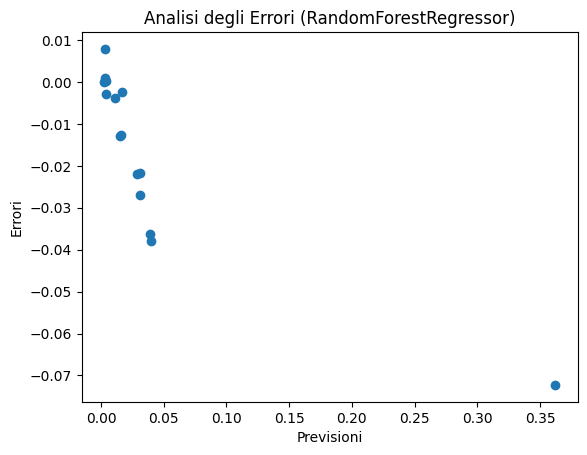

In [21]:
# Assicurati che siano array NumPy o serie Pandas
y_test = np.array(y_test)
predictions_rf = np.array(predictions)
# Analisi degli errori
errore = []
for i in range(len(y_test)):
   errore.append(y_test[i] - predictions_rf[i])
print(errore)
print("--------------------")
# Supponendo che errore sia la tua lista di array
errore_concatenato = np.concatenate(errore)

# Creare un DataFrame pandas con una colonna chiamata 'Errore'
df_errore = pd.DataFrame({'Errore': errore_concatenato})

# Grafico degli errori
plt.scatter(predictions_rf, df_errore)
plt.xlabel('Previsioni')
plt.ylabel('Errori')
plt.title('Analisi degli Errori (RandomForestRegressor)')
plt.show()


In [24]:
#Codice che mi serve solo per controllare se l'allenamento procede correttamente.
#Devo controllare che gli errori non si discostino troppo dai valori reali
#Ora controllo dopo averlo allenato col modello migliore utilizzando gli iperparametri migliori

errorilist2 = []

for a in range(0, len(y_test) - 1):
    errorilist2.append(abs(y_ravel[a] - predictions[a]))
    print(f"Valore reale: {y_ravel[a]} - Valore predetto: {predictions[a]} \n"
         f"Errore di previsione { abs(y_ravel[a] - predictions[a]) } \n")
    
erroriList2 = np.array(errorilist2)

# De-standardizzazione dei residui
residui_originali_2 = []
print(y_test)
for i in range(len(erroriList2)):
    residui_originali_2.append(
        erroriList2[i] * (k2_max - k2_min) + k2_min
    )

print("Residui originali: \n", residui_originali_2)

Valore reale: 0.003225113566605279 - Valore predetto: 0.015848238521967904 
Errore di previsione 0.012623124955362625 

Valore reale: 0.004140073664825046 - Valore predetto: 0.0031814669662954187 
Errore di previsione 0.0009586066985296272 

Valore reale: 0.0022233701657458564 - Valore predetto: 0.015072131945336022 
Errore di previsione 0.012848761779590165 

Valore reale: 0.004064100675260896 - Valore predetto: 0.003932827702203124 
Errore di previsione 0.00013127297305777236 

Valore reale: 0.009362062615101288 - Valore predetto: 0.030979166886639802 
Errore di previsione 0.021617104271538512 

Valore reale: 0.0006431000613873541 - Valore predetto: 0.003606707740370468 
Errore di previsione 0.0029636076789831137 

Valore reale: 0.2896869244935544 - Valore predetto: 0.3619401059564335 
Errore di previsione 0.07225318146287912 

Valore reale: 0.0025698895027624308 - Valore predetto: 0.0025569151295175736 
Errore di previsione 1.2974373244857128e-05 

Valore reale: 0.006957826887661142

Media MSE sulla LOOCV: 0.01092449749630244


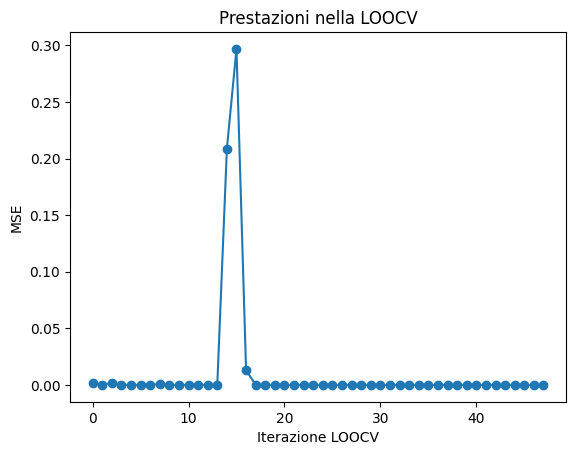

In [25]:
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Supponiamo che X sia il tuo insieme di dati e y sia l'etichetta associata
# # Sostituisci X e y con i tuoi dati effettivi
# 
# # Numero totale di dati
# num_dati = len(df_scaled)
# # Inizializza il regressore
# regressor = RandomForestRegressor()
# 
# # Inizializza un array per tenere traccia delle prestazioni durante l'apprendimento
# performance = []
# 
# # Ciclo attraverso le iterazioni
# for i in range(num_dati):
#     # Seleziona un singolo dato da aggiungere al set di addestramento
#     indice_train = i % num_dati
# 
#     # Aggiorna il set di addestramento
#     X_train = df_scaled[:indice_train + 1]
#     y_train = df_scaled['k_m2'][:indice_train + 1]
# 
#     # Addestra il regressore
#     regressor.fit(X_train, y_train)
# 
#     # Valuta le prestazioni sul set di addestramento
#     y_pred_train = regressor.predict(X_train)
#     mse_train = np.mean((y_train - y_pred_train)**2)
# 
#     performance.append(mse_train)
# 
# # Visualizza come le prestazioni cambiano con l'apprendimento
# plt.plot(performance, marker='o')
# plt.xlabel('Numero di iterazioni')
# plt.ylabel('MSE sul set di addestramento')
# plt.title('Apprendimento cumulativo con RandomForestRegressor')
# plt.show()

from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Supponiamo che X sia il tuo insieme di dati e y sia l'etichetta associata
# Sostituisci X e y con i tuoi dati effettivi



# Inizializza lo schema LOOCV
loo = LeaveOneOut()

# Inizializza un array per tenere traccia delle prestazioni
performance = []

# Ciclo attraverso le iterazioni della LOOCV
for train_index, test_index in loo.split(df_scaled):
    X_train, X_test = df_scaled.drop('k_m2', axis=1).iloc[train_index], df_scaled.drop('k_m2', axis=1).iloc[test_index]
    y_train, y_test = df_scaled['k_m2'].iloc[train_index], df_scaled['k_m2'].iloc[test_index]

    # Addestra il regressore
    regressor.fit(X_train, y_train)

    # Valuta le prestazioni sul set di test
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    performance.append(mse)

# Media degli errori quadratici medi ottenuti in ciascuna iterazione
media_performance = np.mean(performance)
print(f"Media MSE sulla LOOCV: {media_performance}")


# Plot delle prestazioni in ciascuna iterazione
plt.plot(performance, marker='o')
plt.xlabel('Iterazione LOOCV')
plt.ylabel('MSE')
plt.title('Prestazioni nella LOOCV')
plt.show()

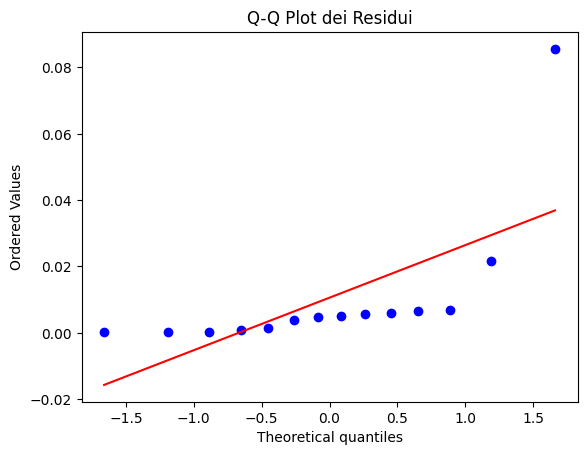

In [82]:
# ANALISI DEI RESIDUI

#QQ plot
from scipy import stats

stats.probplot(erroriList2, plot=plt)
plt.title('Q-Q Plot dei Residui')
plt.show()


In [26]:
#Questo codice aiuta ad identificare i valori anomali nel dataset. 

# Aggiungi i residui al DataFrame originale
df_with_residui = X_test.copy()
df_with_residui['Residui'] = errore

print(df_with_residui.size())
print(errore.size())

# Osservazioni sottostimate (residui negativi)
sottostimate = df_with_residui[df_with_residui['Residui'] < 0]

# Osservazioni sovrastimate (residui positivi)
sovrastimate = df_with_residui[df_with_residui['Residui'] > 0]

# Visualizza le prime righe delle osservazioni sottostimate
print("Osservazioni sottostimate:")
print(sottostimate.head())

# Visualizza le prime righe delle osservazioni sovrastimate
print("\nOsservazioni sovrastimate:")
print(sovrastimate.head())


ValueError: Length of values (15) does not match length of index (1)

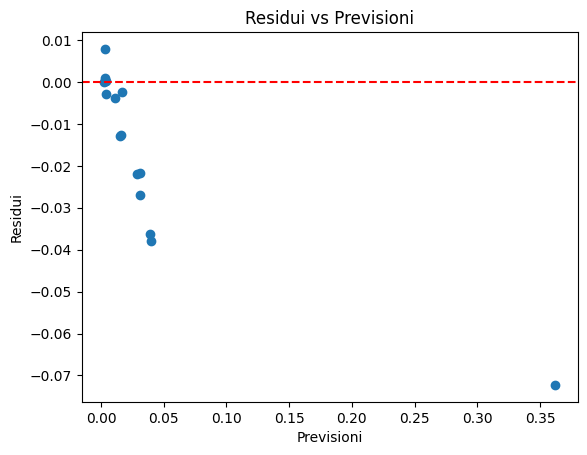

In [27]:
#Grafico dei residui vs valori predetti

plt.scatter(predictions_rf, df_errore['Errore'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Previsioni')
plt.ylabel('Residui')
plt.title('Residui vs Previsioni')
plt.show()

#In teoria qui andrei a cercare la situazione ideale in cuii miei dati si dispongono casualmente intorno alla linea rossa tratteggiata senza alcun ordine particolare ( y = 0 ). I dati al di sopra della linea rossa indicano che il modello sottostima i valori, mentre i dati al di sotto della linea rossa indicano che il modello sovrastima i valori. Inoltre, se i dati sono disposti in modo non casuale, potrebbe essere necessario utilizzare un modello diverso.

In [17]:
# salvare il modello allenato di XGBoost
import pickle

# Salva il modello su disco
with open('RandomForestRegressor_Permeability.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Modello salvato come 'RandomForestRegressor_Permeability.pkl'")
##################################################################

# Carica il modello salvato
import pickle
with open('RandomForestRegressor_Permeability.pkl', 'rb') as model_file:
    loaded_model_RFR_Perm = pickle.load(model_file)

Modello salvato come 'RandomForestRegressor_Permeability.pkl'


In [87]:
from sklearn import gaussian_process
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt




# Suddivisione del dataset in set di addestramento e test

#TODO provare con 0.7 - 30  o  0.7 - 20
X_train, X_test, y_train, y_test = train_test_split(features_X, targets_X, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import time
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Lista degli algoritmi da testare
algorithms = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("SVR", SVR()),
    ("Gaussian Process Regressor", GaussianProcessRegressor()),
    ("MLP Regressor", MLPRegressor()),
    ("XGBoost Regressor", XGBRegressor()),
    ("LGBM Regressor", LGBMRegressor()),
]

# Definisci un dizionario per raccogliere i risultati
results_dict = {
    "Model": [],
    "Training RMSE": [],
    "Training MSE": [],
    "Training R^2": [],
    "Test RMSE": [],
    "Test MSE": [],
    "Test R^2": [],
    "Training Time (s)": []
}

# Ciclo attraverso gli algoritmi e addestra/valuta ciascuno
for name, model in tqdm(algorithms, desc="Testing Algorithms"):
    
    # Misura il tempo di inizio dell'allenamento
    start_time = time.time()

    # Addestramento del modello
    model.fit(X_train, y_train)

    # Calcola il tempo di fine dell'allenamento
    end_time = time.time()
    
    # Calcola il tempo totale di addestramento
    training_time = end_time - start_time   

    # Valutazione del modello sui dati di addestramento
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = model.score(X_train, y_train)

    # Valutazione del modello sui dati di test
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = model.score(X_test, y_test)

    # Aggiungi i risultati al dizionario
    results_dict["Model"].append(name)
    results_dict["Training RMSE"].append(rmse_train)
    results_dict["Training MSE"].append(mse_train)
    results_dict["Training R^2"].append(r2_train)
    results_dict["Test RMSE"].append(rmse_test)
    results_dict["Test MSE"].append(mse_test)
    results_dict["Test R^2"].append(r2_test)
    results_dict["Training Time (s)"].append(training_time)

# Crea un DataFrame da results_dict
risultati_alle_mod_K = pd.DataFrame(results_dict)
# Esporta il DataFrame in un file Excel
risultati_alle_mod_K.to_excel('risultati_alle_mod_K.xlsx', index=False)

Testing Algorithms:   0%|          | 0/10 [00:00<?, ?it/s]C:\Users\Utente\Desktop\Loris_WorkSpace\Permeability_Eval_AI\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
Testing Algorithms:  50%|█████     | 5/10 [00:00<00:00, 24.62it/s]C:\Users\Utente\Desktop\Loris_WorkSpace\Permeability_Eval_AI\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Utente\Desktop\Loris_WorkSpace\Permeability_Eval_AI\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33, number of used features: 0
[LightGBM] [Info] Start training from score 0.085160
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [9]:
#Allenamento modello con ElasticNet
#TODO: da sistemare -> VOGLIO SEMPLICEMENTE AGGIUNGERE UN MODELLO DI ALLENAMENTO.
#PUò ESSERE IMPLEMENTATO SINGOLARMENTE QUI, OPPURE TORNARE NELLA PRIMA FASE DI ALLENAMENTO E GENERARE UN CICLO CHE ALLENA I MODELLI PER LO STESSO DATASET
#IN UNA LISTA DI MODELLI, E POI STAMPARE I RISULTATI DI TUTTI I MODELLI IN UN GRAFICO A BARRE


from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Crea un'istanza del modello Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Iperparametri alpha e l1_ratio possono essere regolati

# Addestra il modello sui dati di addestramento
elastic_net.fit(features_X_train, targets_X_train)
elastic_net.fit(features_Y_train, targets_Y_train)
elastic_net.fit(features_Z_train, targets_Z_train)

# Fai previsioni con il modello
predictions_elastic_X = elastic_net.predict(features_X_test)
predictions_elastic_Y = elastic_net.predict(features_Y_test)
predictions_elastic_Z = elastic_net.predict(features_Z_test)

print(f"R^2 Kx : {r2_score(targets_X_test, predictions_elastic_X)} ")
print(f"R^2 Ky : {r2_score(targets_Y_test, predictions_elastic_Y)} ")
print(f"R^2 Kz : {r2_score(targets_Z_test, predictions_elastic_Z)} ")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- kz
Feature names seen at fit time, yet now missing:
- kx


In [19]:
#Qui inizio a caricare il dataset Berea SandStones
#Libreria 'drd' by @Lukas Mosser
import numpy as np
import matplotlib.pyplot as plt
from drd.datasets.eleven_sandstones import load_eleven_sandstones

# xarray DataArray with image data
img = load_eleven_sandstones("Berea", "Berea_2d25um_grayscale.raw")

data = img.values

# Specifica le dimensioni del tuo array (ad esempio, 1000x1000x1000 per il tuo caso)
shape = (400, 400, 400)

# Specifica il tipo di dato dei tuoi dati (ad esempio, np.uint8 per immagini a scala di grigi)
dtype = np.uint8


# Usa .plot.imshow per visualizzare l'immagine
img.plot.imshow(cmap='gray', aspect='auto')
plt.show()


# Ad esempio, stampa le prime 5 righe di ciascuna dimensione
# print(img[:5, :5, :5])
# 
# 
# 
# 
# import numpy as np
# 
# # Specifica il percorso del file RAW
# file_path = "C:/Users/Utente/Desktop/Berea.raw"
# 
# 
# # Specifica le dimensioni del tuo array (ad esempio, 1000x1000x1000 per il tuo caso)
# shape = (400, 400, 400)
# 
# # Specifica il tipo di dato dei tuoi dati (ad esempio, np.uint8 per immagini a scala di grigi)
# dtype = np.uint8
# 
# 
# # Carica il file RAW in un array NumPy
# raw_data = np.fromfile(file_path, dtype=dtype).reshape(shape)
# 
# 
# 
# # Ad esempio, stampa le prime 5 righe di ciascuna dimensione
# print(raw_data[:5, :5, :5])


# Extract data from the dataset
# data = img.values
# 
# print(data)
# 
# # Converte l'oggetto xarray in un DataFrame
# df = img.to_dataframe()
# 
# # Aggiunge le coordinate come colonne separate
# df['x'] = df.index.get_level_values('x')
# df['y'] = df.index.get_level_values('y')
# df['z'] = df.index.get_level_values('z')
# 
# # Resetta l'indice per ottenere colonne ordinarie
# df.reset_index(drop=True, inplace=True)
# 
# # Ora df è un DataFrame con le colonne 'x', 'y', 'z' e i valori originali
# print(df.head())
# 
# df_parts = np.split(df, 4)
# df_quart = df_parts[0]
# 
# 
# 
# # Dati
# x = df_quart['x']
# y = df_quart['y']
# z = df_quart['z']
# intensity = df_quart['Berea_2d25um_grayscale.raw']
# 
# # Crea una figura 3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# 
# # Crea uno scatter plot 3D
# scatter = ax.scatter(x, y, z, c=intensity, cmap='gray')
# 
# # Aggiungi una barra dei colori
# cbar = fig.colorbar(scatter)
# 
# # Aggiungi etichette agli assi
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('Immagine 3D a scala di grigi')
# 
# # Mostra il grafico
# plt.show()
# 
# 
# 
# # Create a 3D grid for points (x, y, z)
# x, y, z = img.x.values, img.y.values, img.z.values
# 
# # Flatten the data arrays
# x_flat, y_flat, z_flat, data_flat = x.flatten(), y.flatten(), z.flatten(), data.flatten()

# Create a figure and 3D axes


# figure = plt.figure()
# ax = figure.add_subplot(111, projection='3d')
# 
# # Plot the data in 3D with the colormap
# sc = ax.scatter(x_flat, y_flat, z_flat, c=data_flat, cmap='viridis')
# 
# # Add a color bar
# cbar = figure.colorbar(sc)
# 
# # Add labels to the axes
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# 
# # Show the plot
# plt.show()


Using downloaded and verified file: C:\Users\Utente\drd_data\Berea_2d25um_grayscale.raw


ValueError: A 3-dimensional array was passed to imshow(), but there is no dimension that could be color.  At least one dimension must be of size 3 (RGB) or 4 (RGBA), and not given as x or y.

In [ ]:
#Utilizzo il modello per fare previsioni
#Prendo un esempio dal dataset
example = df_imputed.iloc[0]

#Prendo solo le features
example = example.drop(['kx', 'ky', 'kz'])

#Prendo solo i valori
example = example.values.reshape(1, -1)

#Prendo le previsioni
prediction = model_kx.predict(example)

#Stampo le previsioni
print(f"Previsioni: {prediction}")
